## opencv对图像的几何处理及python实现

**在深度学习领域，我们常用平移、旋转、镜像等操作进行数据增广；在传统CV领域，由于某些拍摄角度的问题，我们需要对图像进行矫正处理，而几何变换正是这个处理过程的基础，因此了解和学习几何变换也是有必要的。**
* 几何变换的原理大多都是相似，只是变换矩阵不同，因此，我们以最常用的平移和旋转为例进行学习。
对于一个相素位置的变换方法如下

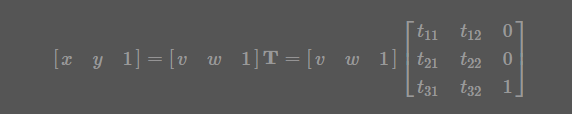

式中的T就是变换矩阵，其中 (v,w)为原坐标，(x,y) 为变换后的坐标，不同的变换对应不同的矩阵，常见的变换矩阵及作用如下表：

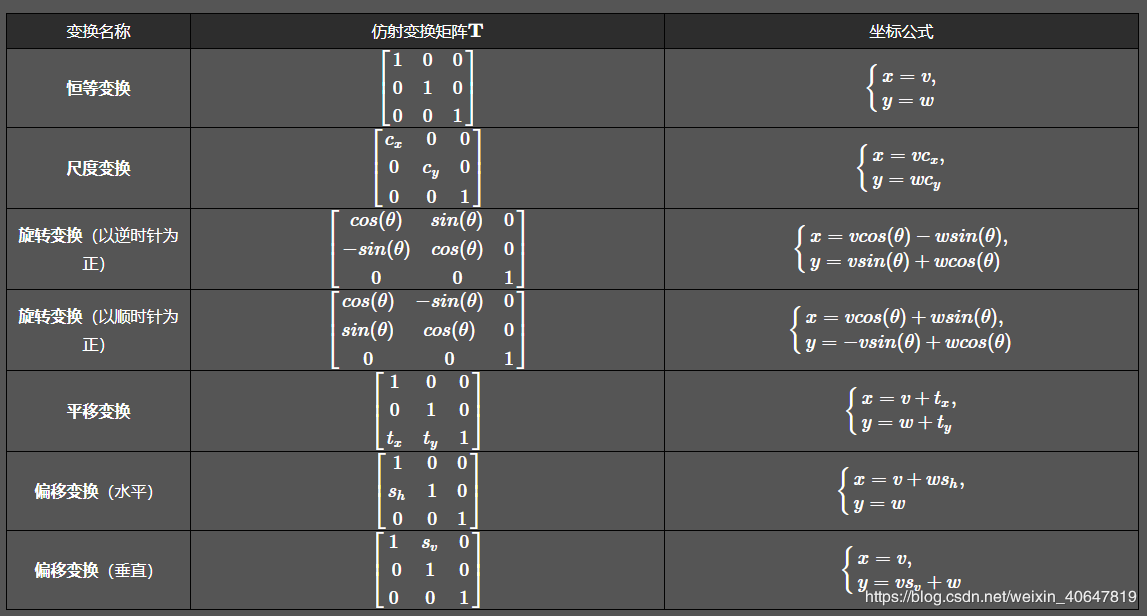

#### 坐标系变换
* 变换中心，对于**缩放、平移**可以以**图像坐标原点（图像左上角为原点）为中心变换**，这不用坐标系变换，直接按照一般形式计算即可。而对于**旋转和偏移**，一般是以**图像中心为原点**，那么这就涉及坐标系转换了。
* 图像坐标的原点在图像左上角，水平向右为 X 轴，垂直向下为 Y 轴。数学课本中常见的坐标系是以图像中心为原点，水平向右为 X 轴，垂直向上为 Y 轴，称为笛卡尔坐标系。看下图:

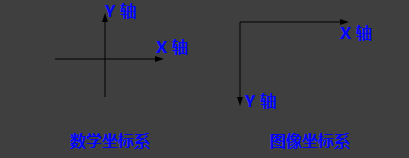

因此，对于旋转和偏移，就需要3步（3次变换）：

* 1.将输入原图图像坐标转换为笛卡尔坐标系；
* 2.进行旋转计算。旋转矩阵前面已经给出了；
* 3.将旋转后的图像的笛卡尔坐标转回图像坐标。

于是，根据前面说的3个步骤（3次变换），旋转(顺时针旋转)的变换形式就为，3次变换就有3个矩阵：



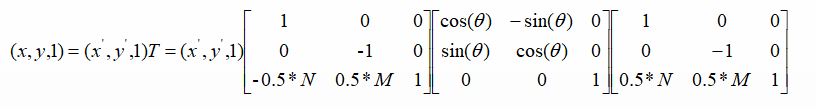

#### 反向映射
* 在冈萨雷斯的《数字图像处理_第三版》中说的很清楚，前向映射就是根据原图用变换公式直接算出输出图像相应像素的空间位置，那么这会导致一个问题：可能会有多个像素坐标映射到输出图像的同一位置，也可能输出图像的某些位置完全没有相应的输入图像像素与它匹配，也就是没有被映射到，造成有规律的空洞（黑色的蜂窝状）。更好的一种方式是采用 反向映射（Inverse Mapping）：扫描输出图像的位置(x,y)，通过 Image （为T的逆矩阵）计算输入图像对应的位置 (v,w)，通过插值方法决定输出图像该位置的灰度值。

#### 插值
* 采用反向映射后，需通过插值方法决定输出图像该位置的值，因此需要选择插值算法。通常有最近邻插值、双线性插值，双三次插值等，OpencV默认采用双线性插值。

下面是opencv中图像的几何变换

In [9]:
import cv2
import numpy as np

图像平移

In [16]:
#读取图片
img = cv2.imread('E:/Machine Learning/OpenCV/task2/task2.jpg',)
#getRotationMatrix2D有三个参数，第一个为旋转中心，第二个为旋转角度，第三个为缩放比例
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
rows,cols,channel=img.shape
move=np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img, move, (rows,cols))
cv2.imshow('original', img)
cv2.imshow('result', dst)
cv2.imwrite('E:/Machine Learning/OpenCV/task2/1.jpg',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

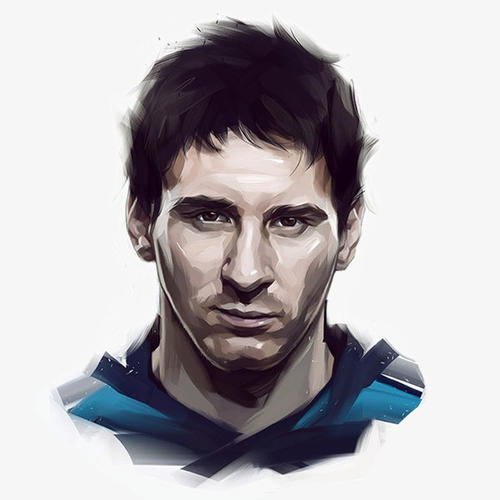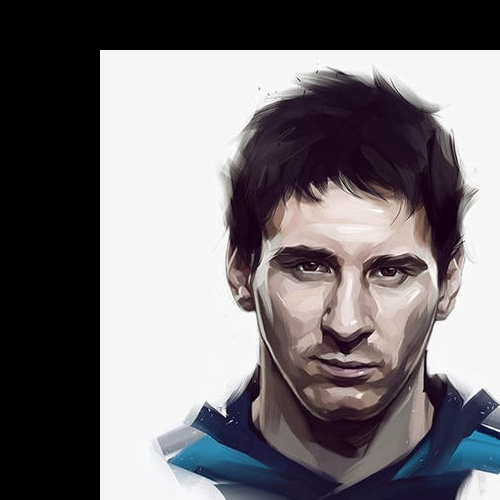

图像旋转

In [13]:
#getRotationMatrix2D有三个参数，第一个为旋转中心，第二个为旋转角度，第三个为缩放比例
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img, M, (rows,cols))
cv2.imshow('original', img)
cv2.imshow('result', dst)
cv2.imwrite('E:/Machine Learning/OpenCV/task2/2.jpg',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

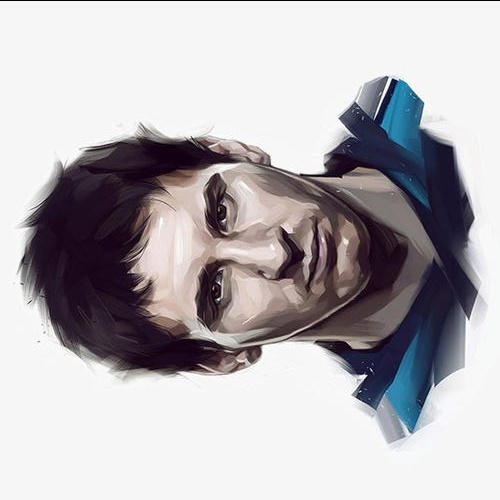

仿射变换
* 仿射变换是一种二维坐标到二维坐标之间的线性变换，并保持二维图形的“平直性”。转换前平行的线，在转换后依然平行。如下图：

In [15]:
pst1=np.float32([[50,50],[0,100],[200,100]])
pst2=np.float32([[10,100],[200,70],[150,300]])
M=cv2.getAffineTransform(pst1,pst2)
dst=cv2.warpAffine(img,M,(rows,cols))
cv2.imshow('original', img)
cv2.imshow('result', dst)
cv2.imwrite('E:/Machine Learning/OpenCV/task2/3.jpg',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

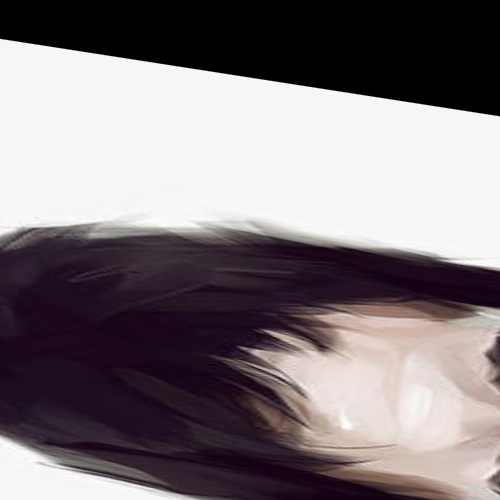

#### 小结
* 1.在传统CV领域，由于相机拍摄角度问题，我们需要对图像进行矫正处理，涉及到的处理方式有平移，旋转，仿射及透视。
* 2.图像几何变换过程是利用变换矩阵，对图像像素坐标进行映射。
* 3.旋转图像需要指定圆心，这里需要对坐标系进行变换，变换到旋转中心为原点的笛卡尔坐标系，映射完成后再变回图像的坐标系
* 4.映射过程以向后映射较好，向前映射有可能出现映射重叠与空洞，映射灰度一般使用双线性插值。